In [8]:
import yfinance as yf

tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period = "max")

tesla_data.reset_index(inplace=True)
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [9]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 
from io import StringIO

url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data2 = requests.get(url2).text 

soup2 = BeautifulSoup(html_data2, "html.parser") 

tables = soup2.find_all("table")

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue = pd.read_html(StringIO(str(table)))[0]
        break

date_col = tesla_revenue.columns[0]
rev_col = tesla_revenue.columns[1]

tesla_revenue = tesla_revenue[[date_col, rev_col]].copy()
tesla_revenue[rev_col] = (
    tesla_revenue[rev_col]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
    .str.replace("-", "", regex=False)
)

tesla_revenue = tesla_revenue.replace("", pd.NA).dropna()
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

print(tesla_revenue.tail())



          Date  Revenue
49  2010-06-30     28.0
50  2010-03-31     21.0
51  2009-12-31      NaN
52  2009-09-30     46.0
53  2009-06-30     27.0


In [8]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 
from io import StringIO

url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data2 = requests.get(url2).text 

soup2 = BeautifulSoup(html_data2, "html.parser") 

tables = soup2.find_all("table")

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue = pd.read_html(StringIO(str(table)))[0]
        break

date_col = tesla_revenue.columns[0]
rev_col = tesla_revenue.columns[1]

tesla_revenue = tesla_revenue[[date_col, rev_col]].copy()
tesla_revenue[rev_col] = (
    tesla_revenue[rev_col]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
    .str.replace("-", "", regex=False)
)

tesla_revenue = tesla_revenue.replace("", pd.NA).dropna()
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

print(tesla_revenue.tail())



          Date  Revenue
49  2010-06-30     28.0
50  2010-03-31     21.0
51  2009-12-31      NaN
52  2009-09-30     46.0
53  2009-06-30     27.0


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
url3 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data3 = requests.get(url3).text
soup3 = BeautifulSoup(html_data3, "html.parser")
tables3 = soup3.find_all("table")
for table in tables3:
    if "GameStop Quarterly Revenue" in table.text:
        gme_revenue = pd.read_html(StringIO(str(table)))[0]
        break
date_col = gme_revenue.columns[0]
rev_col = gme_revenue.columns[1]
gme_revenue = gme_revenue[[date_col, rev_col]].copy()
gme_revenue[rev_col] = (
    gme_revenue[rev_col]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
    .str.replace("-", "", regex=False)
)

gme_revenue = gme_revenue.replace("", pd.NA).dropna()
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue = gme_revenue.dropna(subset=["Revenue"])

print(gme_revenue.tail())


          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


In [2]:
!pip install lxml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 110.3 MB/s eta 0:00:00


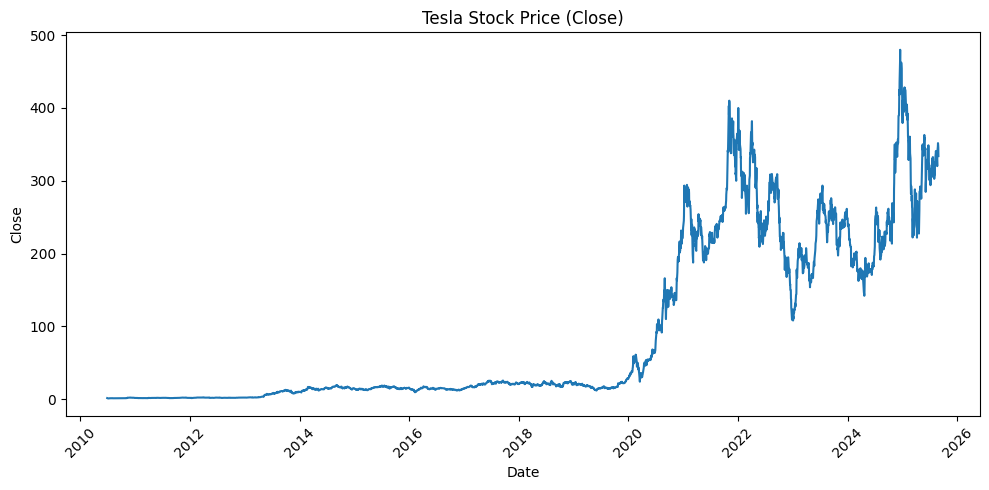

In [10]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10,5))
    plt.plot(stock_data["Date"], stock_data["Close"])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show() 

make_graph(tesla_data, "Tesla Stock Price (Close)")

In [5]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 151.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 167.7 MB/s eta 0:00:00


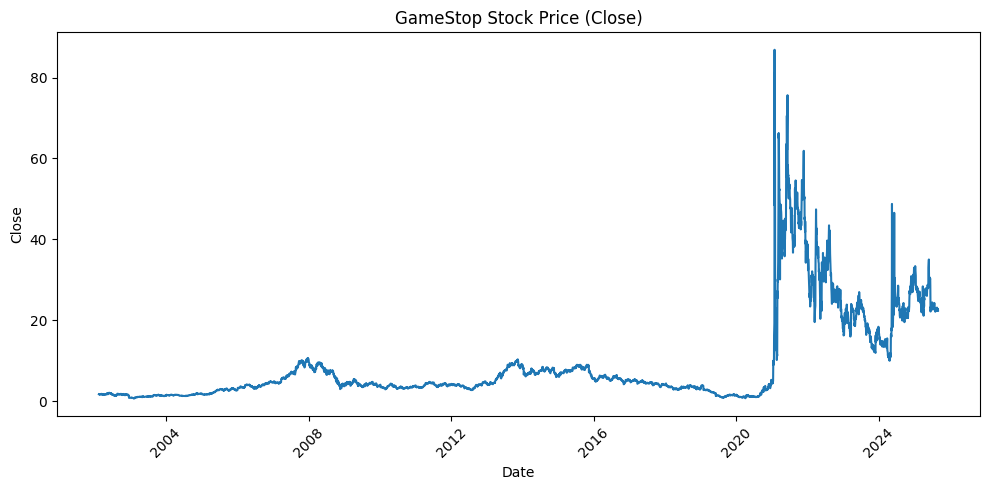

In [11]:
gme = yf.Ticker("GME") 
gme_data = gme.history(period="max") 
gme_data.reset_index(inplace=True) 
make_graph(gme_data, "GameStop Stock Price (Close)")